<a href="https://colab.research.google.com/github/kingtroga/SnapChat_Reviews_Sentiment_Analysis_and_Feature_Extraction_using_Python/blob/main/Sentiment_analyis_of_Snapchat_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SnapChat Reviews Sentiment Analysis and Feature Extraction using Python
###### carried out on approximatily 10000 reviews
- With the advent of Covid-19, Video conferencing and video calls has become more popular that it ever was before. Zoom's Boom is a popular example of that. The video conferencing app experienced a ten times 
increase in usage over that last few years <a id=Citation>(Rahul De', Neena Pandey, Abhipsa Pal, 2020)</a>. Just recently I and a friend of mine had a video call on snapchat. We experienced a lot of issues. The video and the audio
kept lagging. In addition to that the call went off on it's own multiple times.
This lead to the question, "Is SnapChat's video call generally bad?" or "Was it just a problem that I and my friend faced due to bad service or due to the fact that the call was international?". 
- Being that I just finished <a href="https://www.coursera.org/professional-certificates/google-data-analytics">Google's Data Analytics Professional Certification course</a>. I wanted to try out my newly found superpowers and answer my burning questions. So I downloaded a dataset namely 
<a href="https://www.kaggle.com/datasets/databar/10k-snapchat-reviews">"10K Snapchat Reviews"</a> from <a href="https://www.kaggle.com/">Kaggle</a> to use to perform my analysis.To achieve my goal i'm going to be using the popular data analytics libraries along with nltk, vaderSentiment, and textblob for the Sentiment Analysis and Feature Extraction of the dataset. Follow me along on my journey and let's see what we
uncover 🧐
## Description of the dataset used.
The data in the dataset was gotten from the Apple's App Store. It contains each user's reviews, ratings, and the date published. Not only can this dataset be used to answer my questions it can also be used to see which feature needs improvement, which feature is favoured the most by Snapchat's userbase and so on.

In [9]:
#Load the libraries and the dataset

#Import the libraries
!pip install vaderSentiment
import numpy as np
import pandas as pd
from pandas.core.common import random_state
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.collocations import *
from nltk.corpus import stopwords, wordnet 
from nltk.collocations import *
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
fdist = FreqDist()
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from textblob import TextBlob
from wordcloud import WordCloud
import re,string
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
%matplotlib inline 

# Load the dataset
from google.colab import files
uploaded = files.upload()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saving Snapchat_app_store_reviews.csv to Snapchat_app_store_reviews (2).csv


In [81]:
df = pd.read_csv('Snapchat_app_store_reviews.csv')

## Data Preparation and Cleaning
Let's take a sneak peak at the data and get rid of any missing data or bad data.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9560 non-null   int64 
 1   userName    9560 non-null   object
 2   rating      9560 non-null   int64 
 3   review      9560 non-null   object
 4   isEdited    9560 non-null   bool  
 5   date        9560 non-null   object
 6   title       9560 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 457.6+ KB


There seems to be a column that is a repeat of the index column, "Unnamed: 0". Let's check and remove the column if that's the case

In [84]:
df.head()

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"


In [85]:
df = df.drop('Unnamed: 0', axis=1)

In [86]:
df.head()

,userName,rating,review,isEdited,date,title
0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"


For uniformity let's make all the column names into string.title() format. That is:
```Python
str = "userName"
str = str.title()
print(str)
OUTPUT
------
Username
```

In [87]:
df.columns = df.columns.str.title()
df.head()

,Username,Rating,Review,Isedited,Date,Title
0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"


Next Let's set the Username column to the dataframe's index

In [88]:
df.index = df['Username']
df = df.drop('Username', axis=1)
df.head()

,Rating,Review,Isedited,Date,Title
Username,,,,,
Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"


Lastly I'm going to parse the dates as a datetime object

In [89]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9560 entries, Savvanananahhh to Anthony romanempire21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Rating    9560 non-null   int64         
 1   Review    9560 non-null   object        
 2   Isedited  9560 non-null   bool          
 3   Date      9560 non-null   datetime64[ns]
 4   Title     9560 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(2)
memory usage: 382.8+ KB


## Sentiment Analysis and Visualization
- It's just as the title says. We are going to be looking at the [sentiments](https://www.google.com/search?q=Sentiment&oq=sentiment&aqs=chrome.0.69i59l2j0i67i433j0i67l2j69i60l2j69i61.1668j0j7&sourceid=chrome&ie=UTF-8) of all 10k reviews and see if each review is ***Positive***, ***Negative*** or ***Neutral***. To achieve this we are going to be using to libraries which have already been imported into this notebook namely ***vaderSentiment*** and ***textBlob***. P.S, For the people screaming why not just use vader from nltk,
here's the error it was giving me ([error](https://stackoverflow.com/questions/69720269/importerror-cannot-import-name-pairwise-from-nltk-util)). Please if know what the issue is leave a comment explaining how to resolve it. Thank you
- Back to business.Let's prepare our reviews for the task of sentiment analysis. I will remove all the links, punctuation, symbols and other language errors from the reviews with the function ***clean_text()***. We are going to be using two libraries to find the sentiments because neither ***vaderSentiment*** nor ***textblob*** has proven to be more accurate than the other. We would see an example in a moment. Let's make the functions to find the polaritys of each review .
### How Polarity works
- Polarity is typically how we quantify if a sentiment is ***Negative***, ***Positive***, or ***Neutral***.
- It's usually a value being -1 to -1. 
- if value < 0 then sentiment is ***Negative***
- if value > 0 then sentiment is ***Positive***
- if value = 0 then sentiment is ***Neutral***


In [109]:
# Function to clean the text
def clean_text(text):
   text=re.sub(r"\?", ".", text)
   text=re.sub(r"\!", ".", text)
   text=re.sub(r'([.])\1+', r'\1', text)
   rexp=r"\.(?=[A-Za-z]{1,15})"
   text=re.sub(rexp, ". ", text)
   return text
   
df["Review"] = df["Review"].apply(clean_text)

In [110]:
#Functions to get the polarity
def getPolarityTextBlob(text):
    return TextBlob(text).sentiment.polarity

def getPolarityVader(text):
    analyzer = SentimentIntensityAnalyzer()
    result = analyzer.polarity_scores(text)
    return result['compound']

Now let's get the polaritys of each review and add it to our dataframe.

In [111]:
#New columns for answering main questions
df['PolarityTextBlob'] = df['Review'].apply(getPolarityTextBlob)
df['PolarityVader'] = df['Review'].apply(getPolarityVader)

# show the new dataframe with the new column
df.head()

,Rating,Review,Isedited,Date,Title,PolarityTextBlob,PolarityVader,SentimentAnalysisTextBlob,SentimentAnalysisVader
Username,,,,,,,,,
Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,2020-10-04 06:01:00,Performance issues,0.125370,0.9483,Positive,Positive
Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,2020-10-14 02:13:00,What happened?,-0.108684,-0.9785,Negative,Negative
William Quintana,3,Snapchat update ruined my story organization. ...,False,2020-07-31 19:54:00,STORY ORGANIZATION RUINED!,0.110640,0.9785,Positive,Positive
an gonna be unkown😏,5,I really love the app for how long i have been...,False,2021-04-22 14:10:00,The app is great,0.028543,0.8016,Positive,Positive
gzhangziqi,1,This is super frustrating. I was in the middle...,False,2020-10-02 13:58:00,"Locked me out, customer service not helping",0.002778,-0.2220,Positive,Negative


Now let me show an example that proves neither of the libraries, ***textblob*** and ***vaderSentiment***, is more accurate than the other. Above we can see that the Sentiment of the 5th review according to ***textblob*** is postive while according to ***vaderSentiment*** is Negative. Let's take a peek at the review, shall we?

In [112]:
df.iloc[5]["Review"]

'I am very unsatisfied with the new update and I’m pretty sure others can say the same. I’ve had Snapchat for over 4 years now, and this is the worst update by far, the format is completely different and way more complicated. We use to be able to open a message with sliding our finger across the person name, but now when we slide it bring us to snap maps, leaving us to tap the message instead of being able to slide. The benefits of sliding is if we are able to slide we are able to have a peak at the message before we fully open it, so if someone is bothering and you don’t want to respond, or you’re ghosting someone you were able to read their messages without them knowing. Because of this update people who has been using Snapchat for years has to get use to tapping instead of sliding. Also I preferred if snap maps didn’t have its own page, and it was like it was previously, where you can pinch your fingers on the camera to access snap maps. And the final problem is at the bottom there 

This a ***Negative*** review on an update of snapchat. Yet ***textblob*** deemed it ***Postive***.  It isn't the library's fault though the review had some good words like "perfect" which may have confused the library.
Next we are going to create the sentiment columns

In [ ]:
# Function to compute the sentiment analysis (positive, negative, neutral)
def getSentimentAnalysisTextblob(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

def getSentimentAnalysisVader(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


# Columns
df['SentimentAnalysisTextBlob'] = \
     df['PolarityTextBlob'].apply(getSentimentAnalysisTextblob)
df['SentimentAnalysisVader'] = \
     df['PolarityVader'].apply(getSentimentAnalysisVader)
# show first 5 rows of df
df.head()

## Has any user left more than one review

In [ ]:

df2 = pd.DataFrame(df.index.duplicated(), columns = ['Users'])
df2
plt.title('How many users have left more than one review')
plt.xlabel('hasLeftMoreThanOneReview')
plt.ylabel('Counts')
df2['Users'].value_counts().plot(kind='bar', color='Green')
plt.show()

In [ ]:
df2[df2['Users'] == True]

In [ ]:
df.iloc[[4516, 7484, 8319]]
# Just one user has commented over different time periods and is assumed to be the same person

In [ ]:
# Although this one person's thought does not have any impact one the final analysis
# let's hear what he/she has to say
df3 = df.iloc[[4516, 7484, 8319]]
df3 = df3.sort_values(by='Date')
df3

### So how many reviews are negative in the different retrospects?
- According to **vaderSentiment**?
- According to **textblob**?
- mean negative review?

In [114]:
# Negative reviews according to vaderSentiment
negative_review_count_vader= \
    len(df[df['SentimentAnalysisVader'] == 'Negative'])
negative_review_count_vader

2737

In [115]:
# Negative reviews according to textblob
negative_review_count_textblob= \
      len(df[df['SentimentAnalysisTextBlob'] == 'Negative'])
negative_review_count_textblob

2935

In [116]:
# Mean negative review
mean_negative_review_count = (negative_review_count_vader + negative_review_count_textblob)/2
mean_negative_review_count

2836.0

### So how many reviews are ***Positive*** in the different retrospects?
- According to **vaderSentiment**?
- According to **textblob**?
- mean postive review?

In [117]:
# Postive reviews according to vaderSentiment
positive_review_count_vader= \
    len(df[df['SentimentAnalysisVader'] == 'Positive'])
positive_review_count_vader

6742

In [118]:
# Positive reviews according to textblob
positive_review_count_textblob= \
      len(df[df['SentimentAnalysisTextBlob'] == 'Positive'])
positive_review_count_textblob

6454

In [119]:
# Mean positive review
mean_positive_review_count = (positive_review_count_vader + positive_review_count_textblob)/2
mean_positive_review_count

6598.0

### So how many reviews are **Neutral** in the different retrospects?
- According to **vaderSentiment**?
- According to **textblob**?
- mean neutral review?

In [120]:
# Neutral reviews according to vaderSentiment
neutral_review_count_vader= \
    len(df[df['SentimentAnalysisVader'] == 'Neutral'])
neutral_review_count_vader

81

In [121]:
# Neutral reviews according to textblob
neutral_review_count_textblob= \
      len(df[df['SentimentAnalysisTextBlob'] == 'Neutral'])
neutral_review_count_textblob

171

In [122]:
# Mean neutral review
mean_neutral_review_count = (neutral_review_count_vader + neutral_review_count_textblob)/2
mean_neutral_review_count

126.0

### What's the percentage of each Sentiment?
- From both libraries, **textblob** and **vaderSentiment***
- Also whats the mean percentage of each sentiment?

In [123]:
# Percentage vaderSentiment
# Negative
negative_percent_vader = \
         df[df['SentimentAnalysisVader']=='Negative'].shape[0]/df.shape[0] * 100
print("negative_percent_vader: ", negative_percent_vader)
# Positive
positive_percent_vader = \
         df[df['SentimentAnalysisVader']=='Positive'].shape[0]/df.shape[0] * 100
print("positive_percent_vader: ", positive_percent_vader)
# Neutral
neutral_percent_vader = \
        df[df['SentimentAnalysisVader']=='Neutral'].shape[0]/df.shape[0] * 100
print("neutral_percent_vader: ", neutral_percent_vader)

# Percentage textblob
# Negative
negative_percent_textblob = \
      df[df['SentimentAnalysisTextBlob']=='Negative'].shape[0]/df.shape[0] * 100
print("negative_percent_textblob: ", negative_percent_textblob)
# Positive
positive_percent_textblob = \
      df[df['SentimentAnalysisTextBlob']=='Positive'].shape[0]/df.shape[0] * 100
print("positive_percent_textblob: ", positive_percent_textblob)
# Neutral
neutral_percent_textblob = \
    df[df['SentimentAnalysisTextBlob']=='Neutral'].shape[0]/df.shape[0] * 100
print("neutral_percent_textblob: ", neutral_percent_textblob)

# mean percentage
# Negative
mean_negative_percent = (negative_percent_vader + negative_percent_textblob)/2
print("mean_negative_percent: ", mean_negative_percent)
# Positive
mean_positive_percent = (positive_percent_vader + positive_percent_textblob)/2
print("mean_positive_percent: ", mean_positive_percent)
# Neutral
mean_neutral_percent = (neutral_percent_vader + neutral_percent_textblob)/2
print("mean_neutral_percent: ", mean_neutral_percent)



negative_percent_vader:  28.62970711297071
positive_percent_vader:  70.52301255230125
neutral_percent_vader:  0.8472803347280334
negative_percent_textblob:  30.700836820083683
positive_percent_textblob:  67.51046025104603
neutral_percent_textblob:  1.788702928870293
mean_negative_percent:  29.665271966527197
mean_positive_percent:  69.01673640167364
mean_neutral_percent:  1.3179916317991631


<Figure size 720x720 with 0 Axes>

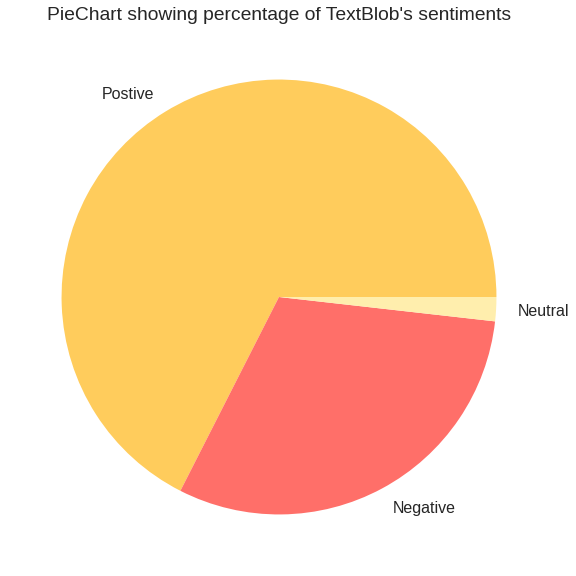

In [124]:
# PieChart for textblob
fig = plt.figure(figsize=(10,10))
labels = ['Postive', 'Negative', 'Neutral']
colors = ['#ffcc5c', '#ff6f69', '#ffeead']
explode = [0, 0.2, 0]
plt.figure(figsize=(10,10))
plt.rc('font', size=16)
plt.title("PieChart showing percentage of TextBlob's sentiments")
plt.pie([positive_percent_textblob,negative_percent_textblob,
         neutral_percent_textblob], labels=labels, colors=colors)
plt.show()

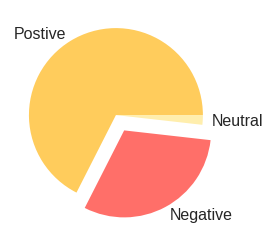

In [125]:
plt.pie([positive_percent_textblob,negative_percent_textblob,
         neutral_percent_textblob], labels=labels, colors=colors,
        explode=explode)
plt.show()

<Figure size 720x720 with 0 Axes>

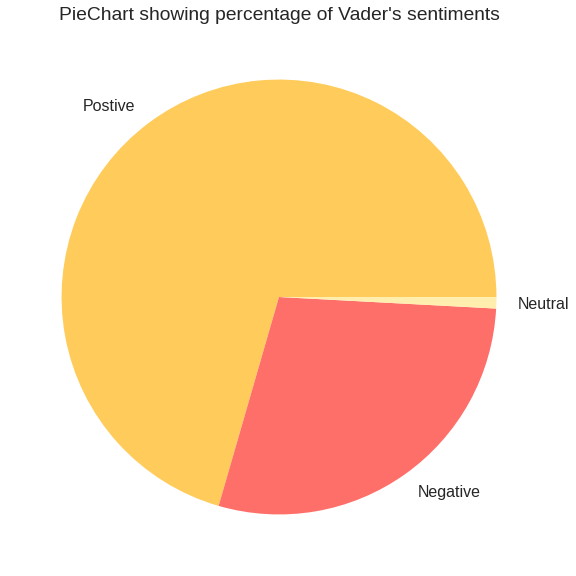

In [126]:
# PieChart for vader
fig = plt.figure(figsize=(10,10))
labels = ['Postive', 'Negative', 'Neutral']
colors = ['#ffcc5c', '#ff6f69', '#ffeead']
explode = [0, 0.2, 0]
plt.figure(figsize=(10,10))
plt.rc('font', size=16)
plt.title("PieChart showing percentage of Vader's sentiments")
plt.pie([positive_percent_vader,negative_percent_vader,
         neutral_percent_vader], labels=labels, colors=colors)
plt.show()

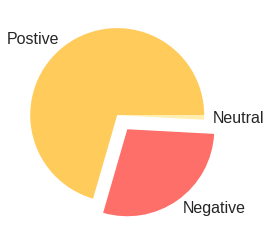

In [127]:
plt.pie([positive_percent_vader,negative_percent_vader,
         neutral_percent_vader], labels=labels, colors=colors,
        explode=explode)
plt.show()

### Word Cloud
We are finally ready to answer my questions. "Are SnapChat Video calls generally bad?". A simple and quick way to answer this is to create a word cloud, which word show the most frequently used words in the reviews left by people sharing their thoughts about Snapchat. If Snapchat's video calls are generally bad. One of the two words is bound to show up in the Word clould

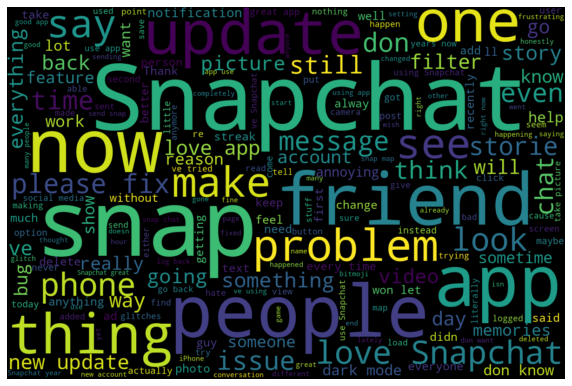

In [135]:
all_words = " ".join(reviews for reviews in df['Review'])
wordCloud = WordCloud(width =1200, height=800, 
                      max_font_size = 200, 
                      background_color = 'black').generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Video does come up (look under the word 'problem') but it looks like it's not a frequently used word among the reviews. Let's take a look at the most frequent words used in reviews with **Positive** sentiments and **Negative** sentiments. As usual for both **vaderSentiment** and **textblob**

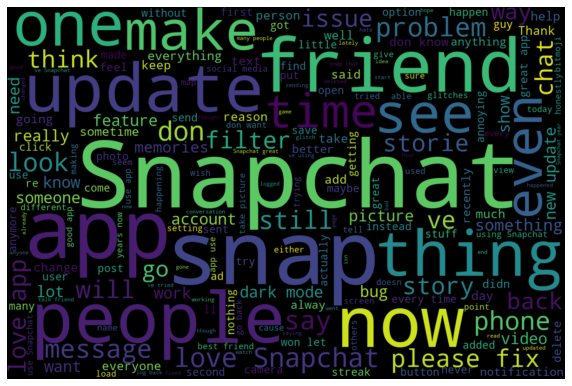

In [138]:
# For  Positive vader
mask = df[df['SentimentAnalysisVader']=='Positive']['Review']
positive = ' '.join(reviews for reviews in mask)
wordCloud = WordCloud(width =1200, height=800, 
                      max_font_size = 200, 
                      background_color = 'black').generate(positive)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()


 I guess people have postive reviews towards one of snapchat's video features. You can't exactly tell which one from a wordcloud. 

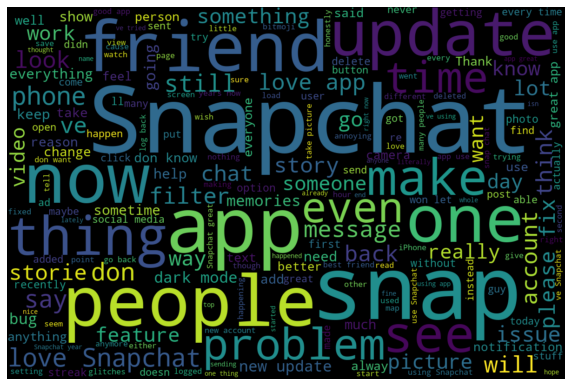

In [139]:
# For  Positive textblob
mask = df[df['SentimentAnalysisTextBlob']=='Positive']['Review']
positive = ' '.join(reviews for reviews in mask)
wordCloud = WordCloud(width =1200, height=800, 
                      max_font_size = 200, 
                      background_color = 'black').generate(positive)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

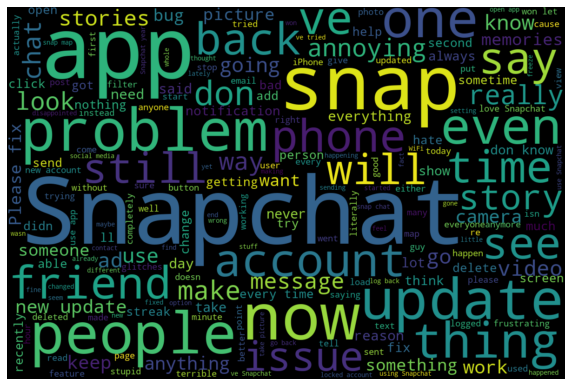

In [140]:
# For Negative vader
mask = df[df['SentimentAnalysisVader']=='Negative']['Review']
negative = ' '.join(reviews for reviews in mask)
wordCloud = WordCloud(width =1200, height=800, 
                      max_font_size = 200, 
                      background_color = 'black').generate(negative)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

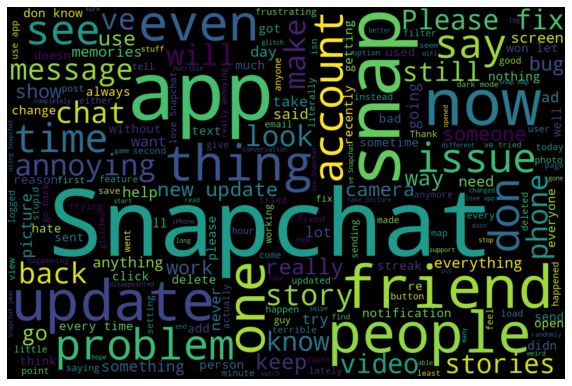

In [141]:
# For Negative textblob
mask = df[df['SentimentAnalysisTextBlob']=='Negative']['Review']
negative = ' '.join(reviews for reviews in mask)
wordCloud = WordCloud(width =1200, height=800, 
                      max_font_size = 200, 
                      background_color = 'black').generate(negative)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- The four word clouds above we can't really answer the question, "Are Snapchat video calls generally bad among it's users?". Due to the fact that the word 'video' appears in all four Word clouds i.e (Positive Vader's Word Cloud, Negative Vader's word Cloud, Positive TextBlob's Word Cloud, and Negative TextBlob's word cloud) and the size of the word looks relatively the same in all the word clouds apart from Negative TextBlob's word cloud where it looks a little bigger than the rest. And not much can be infered from that little observation
- Nevertheless, that's why the title of this project is called **Sentiment analysis** and **Feature Extraction**. The Journey is yet to be completed. Time for the feature extraction

##Feature extraction 
We are almost at the end of our journey. It took us 51 cells to get here. And now to continue in our search for answers. We are going to be performing what is called [feature extraction](https://www.youtube.com/watch?v=7YacOe4XwhY&t=49s) with the [nltk](https://www.youtube.com/watch?v=X2vAabgKiuM&t=1061s) library on our dataset. Basically with the large amount of data we have, the reviews especially. We divide each review into a list of single words then lemmatize the list to assign to each word the appropriate part of speech. Then we find two words that collocate and three words that collocate and measure the polarity of the word group. You would understand better down the line. To better understand what I just explained click on nlkt. Here's the algorithm used for this:
![Algorithm](https://www.researchgate.net/profile/Emitza_Guzman/publication/282272480/figure/fig1/AS:663966078468096@1535313257529/Overview-of-the-approach.png)
<hr style="margin-bottom: 40px;">


Let's run this process on the negative sentiments only
and see the results

In [ ]:
# Dataframes For only reviews with negative sentiment for both Textblob and Vader
df100 = df[df['SentimentAnalysisTextBlob'] == 'Negative']
df101 = df[df['SentimentAnalysisVader'] == 'Negative']
df100.head()
df101.head()

Since we already cleaned the "Review" Column when we were doing the Sentiment analysis we don't have to do that again. We can just straight up tokenize the all the "Review" in the review column and store them in a new column called "TokenizedReview". Tokenize means to take a string of text and make that string into a list of words or sentences. In the use case below sent_tokenize takes a string of text and breaks it into a list of sentences

In [ ]:
# Creating TokenizedReview column for TextBlob
df100['TokenizedReview'] = df100['Review'].apply(sent_tokenize)

In [ ]:
# Creating TokenizedReview column for Vader
df101['TokenizedReview'] = df101['Review'].apply(sent_tokenize)

Next we open the acquired lists as different rows so as to make the feature extraction easier

In [149]:
# opening the list as different rows Textblob
df100 = df100.explode('TokenizedReview', ignore_index=False)

In [150]:
# openint the list as different rows Vader
df101 = df101.explode('TokenizedReview', ignore_index=False)

The function below is what extracts the lemmas of nouns, varbs and adjectives. Essentialy it's the function below that lemmatizes the reviews

In [151]:
def lemma_words_pos_filtered(text):
  """
  A Function to basically filter out parts of speech in text that can't possibly
  be a feature
  """
  word_list = []
  lemmatizer = WordNetLemmatizer()
  tokens = nltk.word_tokenize(text)
  pos_tokens = nltk.pos_tag(tokens)
  for pos in pos_tokens:
    if (pos[1].startswith('N')):
      word_list=word_list+[lemmatizer.lemmatize(pos[0].lower(),
                                                 wordnet.NOUN)]
    if (pos[1].startswith('V')):
      word_list=word_list+[lemmatizer.lemmatize(pos[0].lower(), wordnet.VERB)]
    if (pos[1].startswith('J')):
      word_list=word_list +[lemmatizer.lemmatize(pos[0].lower(), wordnet.ADJ)]

  word_list = [word for word in word_list if word not in 
               stopwords.words('english')]
  
  return " ".join(word_list)

Now it's time for as to lemmatize the "TokenizedReview" column for both libraries and store the results in their "Lemma_Words_Pos_Filtered" column

In [152]:
# Negative textblob
df100['Lemma_Words_Pos_Filtered']=df100['TokenizedReview'].apply(lemma_words_pos_filtered)

In [153]:
#Negative vader
df101['Lemma_Words_Pos_Filtered']=df101['TokenizedReview'].apply(lemma_words_pos_filtered)

Next we find the top 50 most likely bigrams using a window size of 5  for the Negative text blob sentiments dataframe

In [154]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finderBigramNegativeTextblob = BigramCollocationFinder.from_words(
    " ".join(df100['Lemma_Words_Pos_Filtered']).split(), window_size = 5)
print(finderBigramNegativeTextblob)
# keeping bigrams that occur at least 5 times
finderBigramNegativeTextblob.apply_freq_filter(5)
bigram_list_tuples_negative_textblob=finderBigramNegativeTextblob.nbest(
    bigram_measures.likelihood_ratio, 50
)


and the Negative Vader sentiments dataframe

In [155]:
#Negative vader only
bigram_measures = nltk.collocations.BigramAssocMeasures()
finderBigramNegativeVader = BigramCollocationFinder.from_words(
    " ".join(df101['Lemma_Words_Pos_Filtered']).split(), window_size = 5)
print(finderBigramNegativeVader)
# keeping bigrams that occur at least 5 times
finderBigramNegativeVader.apply_freq_filter(5)
bigram_list_tuples_negative_vader=finderBigramNegativeVader.nbest(
    bigram_measures.likelihood_ratio, 50
)


We also repeat the process for trigrams for both **textblob** and **vaderSentiment**

In [156]:
# repeat the process for trigrams Negative text blob
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finderTrigramNegativeTextblob = TrigramCollocationFinder.from_words(
    " ".join(df100['Lemma_Words_Pos_Filtered']).split(), window_size= 5)
# trigrams that occur at least 5 times
finderTrigramNegativeTextblob.apply_freq_filter(5)
trigram_list_tuples_negative_textblob=finderTrigramNegativeTextblob.nbest(
    trigram_measures.likelihood_ratio, 50
)

In [157]:
# Trigram Vader
# repeat the process for trigrams Negative vader
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finderTrigramNegativeVader = TrigramCollocationFinder.from_words(
    " ".join(df101['Lemma_Words_Pos_Filtered']).split(), window_size= 5)
# trigrams that occur at least 5 times
finderTrigramNegativeVader.apply_freq_filter(5)
trigram_list_tuples_negative_vader=finderTrigramNegativeVader.nbest(
    trigram_measures.likelihood_ratio, 50
)

To keep only unique tuples ,that is we don't want tuples that contain two of the same words, let's create the unique_tuples() function

In [159]:
def unique_tuples (list_of_tuples):
  list_ = [tuple(sorted(t)) for t in list_of_tuples] 
  list_ = list(set(list_)) # what is making the bigrams, trigrams, and fourgrams unique
  return list_

After useing the unique_tuples() function for it's purpose. We store the length of each bigram or trigram tuple.

In [162]:
#bigram for negative text blob
bigram_features_negative_textblob=unique_tuples(bigram_list_tuples_negative_textblob)
length_bigram_features_negative_textblob=len(bigram_features_negative_textblob)

In [163]:
#bigram for negative vader
bigram_features_negative_vader=unique_tuples(bigram_list_tuples_negative_vader)
length_bigram_features_negative_vader=len(bigram_features_negative_vader)

In [164]:
#trigram for negative text
trigram_features_negative_textblob=unique_tuples(trigram_list_tuples_negative_textblob)
length_trigram_features_negative_textblob=len(trigram_features_negative_textblob)

In [165]:

#trigram for negative text
trigram_features_negative_vader=unique_tuples(trigram_list_tuples_negative_vader)
length_trigram_features_negative_vader=len(trigram_features_negative_vader)


Next, we will find the occurrence of bigrams tuples in the sentences of which we will get the sentiment scores (via TextBlob and Vader) to infer the sentiment of the extracted features

Functions to find the Bigrams

In [166]:
#for Textblob
def findbigramsnegativetextblobintext(text):
  mylist=nltk.word_tokenize(text)
  list1=[x for x in mylist]
  feature_list = []
  for i in range(length_bigram_features_negative_textblob):
    # In each iteration, add an empty list to the main list
    feature_list.append([])

  i=0
  # bigram_features is the list of unique set of bigrams found after 
  # collocation
  for l in bigram_features_negative_textblob:
    list2 = [x for x in l]
    result = all(elem in list1 for elem in list2)
    if result:
      feature_list[i].append(' '.join(list2))
    i = i + 1
  return feature_list 

In [167]:
#for Vader
def findbigramsnegativevaderintext(text):
  mylist=nltk.word_tokenize(text)
  list1=[x for x in mylist]
  feature_list = []
  for i in range(length_bigram_features_negative_vader):
    # In each iteration, add an empty list to the main list
    feature_list.append([])

  i=0
  # bigram_features is the list of unique set of bigrams found after 
  # collocation
  for l in bigram_features_negative_vader:
    list2 = [x for x in l]
    result = all(elem in list1 for elem in list2)
    if result:
      feature_list[i].append(' '.join(list2))
    i = i + 1
  return feature_list 

Functions to find the trigrams

In [169]:
# for negative textblob
def findtrigramsnegativetextblobintext(text):
  mylist=nltk.word_tokenize(text)
  list1=[x for x in mylist]
  feature_list = []
  for i in range(length_trigram_features_negative_textblob):
    # In each iteration, add an empty list to the main list
    feature_list.append([])
    
  i=0
  # bigram_features is the list of unique set of bigrams found after 
  # collocation
  for l in trigram_features_negative_textblob:
    list2 = [x for x in l]
    result = all(elem in list1 for elem in list2)
    if result:
      feature_list[i].append(' '.join(list2))
    i = i + 1
  return feature_list

In [170]:
# for negative Vader
def findtrigramsnegativevaderintext(text):
  mylist=nltk.word_tokenize(text)
  list1=[x for x in mylist]
  feature_list = []
  for i in range(length_trigram_features_negative_vader):
    # In each iteration, add an empty list to the main list
    feature_list.append([])
    
  i=0
  # bigram_features is the list of unique set of bigrams found after 
  # collocation
  for l in trigram_features_negative_vader:
    list2 = [x for x in l]
    result = all(elem in list1 for elem in list2)
    if result:
      feature_list[i].append(' '.join(list2))
    i = i + 1
  return feature_list

Now let's apply these functions to their respective caculation values

In [171]:

df100['Bigram_list_Negative_Textblob'] = df100['Lemma_Words_Pos_Filtered'].apply(findbigramsnegativetextblobintext)
df101['Bigram_list_Negative_Vader'] = df101['Lemma_Words_Pos_Filtered'].apply(findbigramsnegativevaderintext)
df100['Trigram_list_Negative_Textblob'] = df100['Lemma_Words_Pos_Filtered'].apply(findtrigramsnegativetextblobintext)
df101['Trigram_list_Negative_Vader'] = df101['Lemma_Words_Pos_Filtered'].apply(findtrigramsnegativevaderintext)


Let's take a look at our newly created feature columns

In [172]:
df100['Bigram_list_Negative_Textblob']

Username
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
                                        ...                        
JJtheJettPlane    [[], [], [], [], [], [], [], [], [], [], [], [...
JJtheJettPlane    [[], [], [], [], [], [], [], [], [], [], [], [...
MrsRobertson19    [[], [], [], [], [], [], [], [], [], [], [], [...
MrsRobertson19    [[], [], [], [], [], [], [], [], [], [], [], [...
MrsRobertson19    [[], [], [], [], [], [], [], [], [], [], [], [...
Name: Bigram_list_Negative_Textblob, Length: 15897, dtype: object

In [173]:
df101['Bigram_list_Negative_Vader']

Username
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
                                               ...                        
teekay2much              [[], [], [], [], [], [], [], [], [], [], [], [...
teekay2much              [[], [], [], [], [], [], [], [], [], [], [], [...
teekay2much              [[], [], [], [], [], [], [], [], [], [], [], [...
Anthony romanempire21    [[], [], [], [], [], [], [], [], [], [], [], [...
Anthony romanempire21    [[], [], [], [], [], [], [], [], [], [], [], [...
Name: Bigram_list_Negative_Vader, Length: 15276, dtype: object

In [174]:
df100['Trigram_list_Negative_Textblob']

Username
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112     [[], [], [], [], [], [], [], [], [], [], [], [...
                                        ...                        
JJtheJettPlane    [[], [], [], [], [], [], [], [], [], [], [], [...
JJtheJettPlane    [[], [], [], [], [], [], [], [], [], [], [], [...
MrsRobertson19    [[], [], [], [], [], [], [], [], [], [], [], [...
MrsRobertson19    [[], [], [], [], [], [], [], [], [], [], [], [...
MrsRobertson19    [[], [], [], [], [], [], [], [], [], [], [], [...
Name: Trigram_list_Negative_Textblob, Length: 15897, dtype: object

In [175]:
df101['Trigram_list_Negative_Vader']

Username
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112            [[], [], [], [], [], [], [], [], [], [], [], [...
                                               ...                        
teekay2much              [[], [], [], [], [], [], [], [], [], [], [], [...
teekay2much              [[], [], [], [], [], [], [], [], [], [], [], [...
teekay2much              [[], [], [], [], [], [], [], [], [], [], [], [...
Anthony romanempire21    [[], [], [], [], [], [], [], [], [], [], [], [...
Anthony romanempire21    [[], [], [], [], [], [], [], [], [], [], [], [...
Name: Trigram_list_Negative_Vader, Length: 15276, dtype: object

As you can see they are a ton on empty list above. The empty lists correspond to the tuples in bigram_features not found in the sentence. We will remove these empty list and also flatten the list.
Flatten means make a list of lists a list of just the elements that were in the list.

In [176]:
def keepnoempty(list1):
  mylist = [x for x in list1 if x != []] #easy to understand
  return mylist

def flatten_list(row_list):
  l = [item for inner_list in row_list for item in inner_list]
  return l 

#listoflists = [ [1, 2, 3], [4, 5, 6], [7, 8, 9]]
#anoter = flatten_list(listoflists)
#output = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [177]:
# Bigrams Negative textblob
df100['BigramsNegativeTextblob'] = df100['Bigram_list_Negative_Textblob'].apply(keepnoempty)
df100['BigramsNegativeTextblob'] = df100['BigramsNegativeTextblob'].apply(flatten_list)


In [178]:
# Bigrams Negative vader
df101['BigramsNegativeVader'] = df101['Bigram_list_Negative_Vader'].apply(keepnoempty)
df101['BigramsNegativeVader'] = df101['BigramsNegativeVader'].apply(flatten_list)

In [179]:
# TrigramsNegativeTextblob
df100['TrigramsNegativeTextblob'] = df100['Trigram_list_Negative_Textblob'].apply(keepnoempty)
df100['TrigramsNegativeTextblob'] = df100['TrigramsNegativeTextblob'].apply(flatten_list)

In [180]:
# TrigramsNegativeVader
df101['TrigramsNegativeVader'] = df101['Trigram_list_Negative_Vader'].apply(keepnoempty)
df101['TrigramsNegativeVader'] = df101['TrigramsNegativeVader'].apply(flatten_list)




Still if we take a look at the data now the empty list within the column will have reduced but there would still be empty lists.Note that thes empty lists in the columns signify that no bigram or trigram was found in the row to begin with in the first place 

In [202]:
'\n' not in  df101['TrigramsNegativeVader']

True

In [181]:
df101['TrigramsNegativeVader']

Username
Idek 9-101112            []
Idek 9-101112            []
Idek 9-101112            []
Idek 9-101112            []
Idek 9-101112            []
                         ..
teekay2much              []
teekay2much              []
teekay2much              []
Anthony romanempire21    []
Anthony romanempire21    []
Name: TrigramsNegativeVader, Length: 15276, dtype: object

Now we expand the list of bigrams extracted into separate rows then using groupby(), caculate mean sentiment scores

In [182]:
df100 = df100.explode('BigramsNegativeTextblob', ignore_index=False)
df101 = df101.explode('BigramsNegativeVader', ignore_index=False)

In [183]:
df100 = df100.explode('TrigramsNegativeTextblob', ignore_index=False)
df101 = df101.explode('TrigramsNegativeVader', ignore_index=False)


In [188]:
# Sentiment score  for Negative Bigrams caculated with TextBlob
df100[['BigramsNegativeTextblob', 'PolarityTextBlob']].groupby('BigramsNegativeTextblob')['PolarityTextBlob'].mean().sort_values()


BigramsNegativeTextblob
review write       -0.170674
fail say           -0.155546
post story         -0.147490
camera quality     -0.137704
delete download    -0.135877
customer service   -0.135007
iphone x           -0.134673
data wifi          -0.134153
long time          -0.133452
win ’              -0.132330
lock reason        -0.131260
let win            -0.130251
snapchat year      -0.129929
camera roll        -0.122982
get lock           -0.122453
story watch        -0.122356
give star          -0.121154
fix please         -0.118369
fix need           -0.117936
change password    -0.117373
get notification   -0.116322
discover page      -0.115740
bar bottom         -0.115588
number phone       -0.111568
log log            -0.111535
say “              -0.109515
“ ”                -0.108141
app delete         -0.107722
account lock       -0.107342
message send       -0.105752
new update         -0.103331
black bottom       -0.102762
bar black          -0.102381
picture take       

In [186]:
# Sentiment score for  Negative bigrams caculated with Vader
df101[['BigramsNegativeVader', 'PolarityVader']].groupby('BigramsNegativeVader')['PolarityVader'].mean().sort_values()

BigramsNegativeVader
bar bottom         -0.690932
connection error   -0.690742
customer service   -0.679206
review write       -0.659658
chat swipe         -0.650181
lose streak        -0.648318
bar black          -0.644224
black bottom       -0.643389
story watch        -0.622392
snapchat year      -0.621490
number phone       -0.619437
new update         -0.616759
iphone x           -0.616708
give star          -0.612435
multiple time      -0.611821
get lock           -0.608367
long time          -0.602311
account lock       -0.600571
party third        -0.598448
fix need           -0.595633
lock reason        -0.589867
make new           -0.583833
story view         -0.582701
camera quality     -0.582010
let win            -0.581922
change password    -0.576093
account make       -0.575972
medium social      -0.571879
account log        -0.570261
app delete         -0.568828
“ ”                -0.567515
win ’              -0.563081
log try            -0.561395
phone restart      -0.

In [189]:
# Sentiment score for  negative trigrams caculated with TextBlob
df100[['TrigramsNegativeTextblob', 'PolarityTextBlob']].groupby('TrigramsNegativeTextblob')['PolarityTextBlob'].mean().sort_values()

TrigramsNegativeTextblob
anything fix please    -0.289957
fix please wrong       -0.212733
asap fix please        -0.203855
fix please win         -0.179733
annoy fix please       -0.179246
fix please work        -0.173614
fix please show        -0.169377
fix give please        -0.166889
fix please use         -0.166638
annoying fix please    -0.165599
fix im please          -0.164049
fix glitch please      -0.158092
fix please time        -0.153638
fix please snap        -0.150026
app fix please         -0.147299
account fix please     -0.142049
fix please try         -0.140698
fix friend please      -0.140244
fix happen please      -0.138765
fix please year        -0.137389
bug fix please         -0.130614
fix past please        -0.129968
fix please ’           -0.129767
fix please problem     -0.127312
fix please thank       -0.123766
fix please possible    -0.119328
fix please snapchat    -0.117116
fix fix please         -0.116534
fix please please      -0.116534
fix issue please  

In [191]:
# Sentiment score for trigrams caculated with Vader
df101[['TrigramsNegativeVader', 'PolarityVader']].groupby('TrigramsNegativeVader')['PolarityVader'].mean().sort_values()

TrigramsNegativeVader
news “ ”               -0.821357
error “ ”              -0.760344
violate “ ”            -0.703620
hate new update        -0.672861
discover “ ”           -0.666760
asap fix please        -0.659086
know win ’             -0.658519
bad new update         -0.653292
add “ ”                -0.653106
account “ ”            -0.622966
read “ ”               -0.619863
make new update        -0.601100
update “ ”             -0.599229
new update update      -0.597417
horrible new update    -0.592763
fix please problem     -0.587199
account account lock   -0.586825
account lock lock      -0.586825
let win ’              -0.584252
lock “ ”               -0.583923
fix glitch please      -0.580944
try “ ”                -0.571391
tap “ ”                -0.567498
win ’ ’                -0.564425
connection “ ”         -0.561188
fix please snapchat    -0.557095
“ ” ”                  -0.555479
“ “ ”                  -0.555479
connect “ ”            -0.552673
’ “ ”                

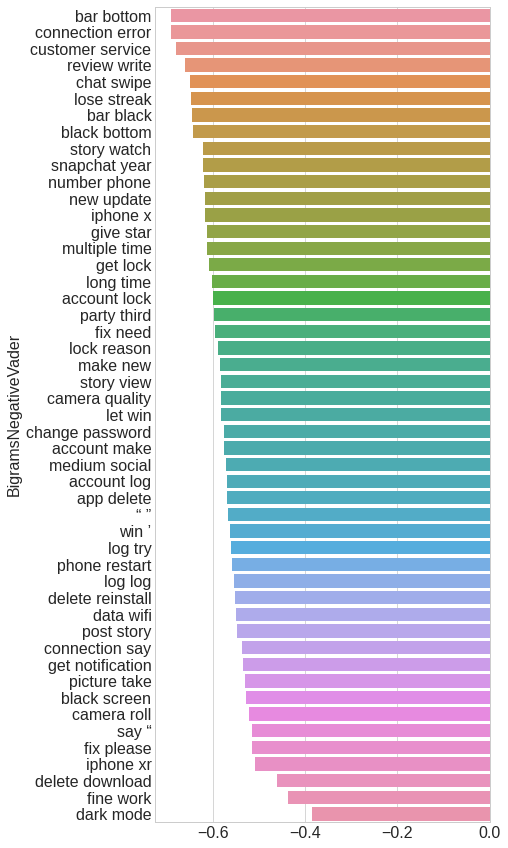

In [193]:
# Visual represtation of findings Negative
# Sentiment Score caculated with Vader
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df88 = df101[['BigramsNegativeVader', 'PolarityVader']].groupby('BigramsNegativeVader')['PolarityVader'].mean().sort_values()
sns.barplot(x = df88.values, y = df88.index)
#df[['Bigrams', 'Compound']].groupby('Bigrams')['Bigrams'].mean().sort_values().size().plot(kind = 'bar')

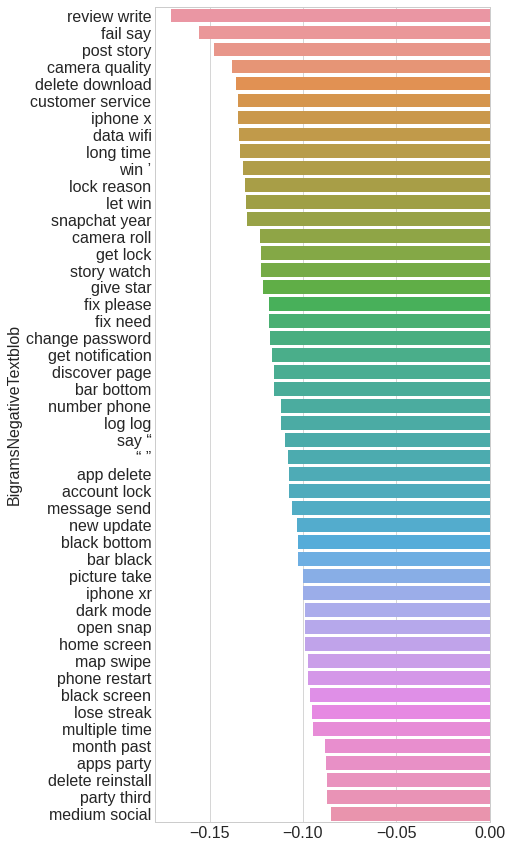

In [194]:
# Visual represtation of findings Negative
#  for Sentiment Score caculated with textblob
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df99 = df100[['BigramsNegativeTextblob', 'PolarityTextBlob']].groupby('BigramsNegativeTextblob')['PolarityTextBlob'].mean().sort_values()
sns.barplot(x = df99.values, y = df99.index)

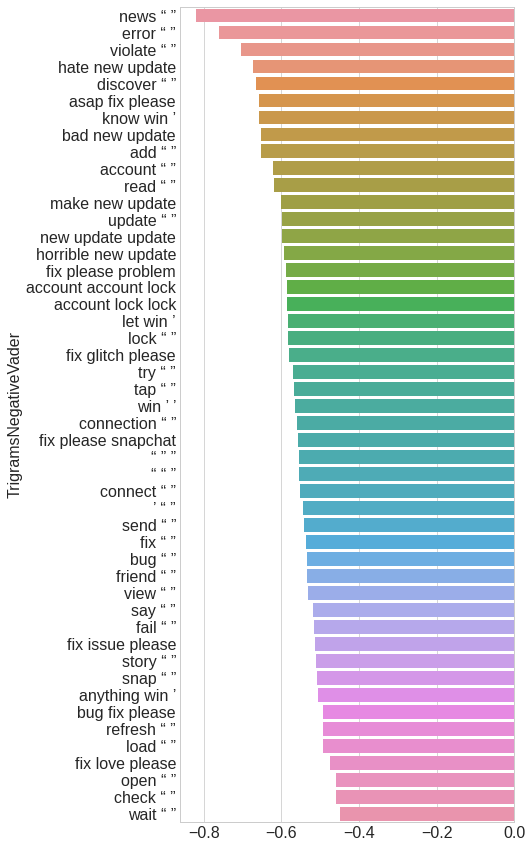

In [196]:
# Visual represtation of findings Trigram
# Sentiment Score caculated with Vader
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df88 = df101[['TrigramsNegativeVader', 'PolarityVader']].groupby('TrigramsNegativeVader')['PolarityVader'].mean().sort_values()
sns.barplot(x = df88.values, y = df88.index)

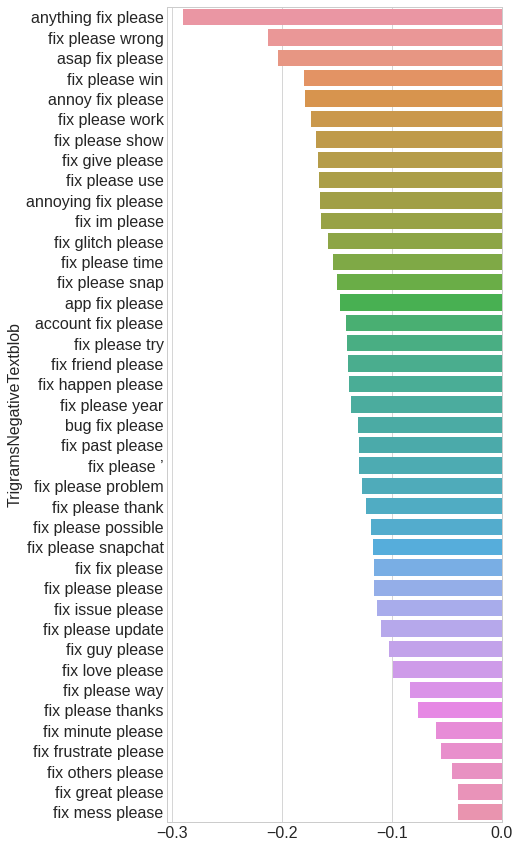

In [197]:
# Visual represtation of findings 
# Sentiment Score caculated with TextBlob
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df88 = df100[['TrigramsNegativeTextblob', 'PolarityTextBlob']].groupby('TrigramsNegativeTextblob')['PolarityTextBlob'].mean().sort_values()
sns.barplot(x = df88.values, y = df88.index)

# Repeating the same process but this time for all the sentiments at once

In [203]:
df['TokenizedReview'] = df['Review'].apply(sent_tokenize)

In [ ]:
df = df.explode('TokenizedReview', ignore_index=False)
df.head()

 We need reasonable features and to get that we need reasonable words and that's why we need the lemmatizing function this function extracts lemmas of nouns, verbs and adjectives

In [206]:
df['Lemma_Words_Pos_Filtered']=df['TokenizedReview'].apply(lemma_words_pos_filtered)

In [208]:

# Next we find the top 50 most likely bigrams using a window size of 5
bigram_measures = nltk.collocations.BigramAssocMeasures()
finderBigram = BigramCollocationFinder.from_words(
    " ".join(df['Lemma_Words_Pos_Filtered']).split(), window_size = 5)
print(finderBigram)
# keeping bigrams that occur at least 5 times
finderBigram.apply_freq_filter(5)
bigram_list_tuples=finderBigram.nbest(
    bigram_measures.likelihood_ratio, 50
)

# repeat the process for trigrams
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finderTrigram = TrigramCollocationFinder.from_words(
    " ".join(df['Lemma_Words_Pos_Filtered']).split(), window_size= 5)
# trigrams that occur at least 5 times
finderTrigram.apply_freq_filter(5)
trigram_list_tuples=finderTrigram.nbest(
    trigram_measures.likelihood_ratio, 50
)


In [209]:
len(bigram_list_tuples)

50

In [210]:
# to keep only unique tuples that is we don't want tuples that contain two of 
# the same words

def unique_tuples (list_of_tuples):
  list_ = [tuple(sorted(t)) for t in list_of_tuples] 
  list_ = list(set(list_)) # what is making the bigrams, trigrams, and fourgrams unique
  return list_
#bigram
bigram_features=unique_tuples(bigram_list_tuples)
length_bigram_features=len(bigram_features)

#trigram
trigram_features=unique_tuples(trigram_list_tuples)
length_trigram_features=len(trigram_features)


In [211]:
# Next, we will find the occurrence of bigrams tuples in the sentences on
# which we will apply sentiment score (via TextBlob and Vader) to infer the 
# sentiment on the extracted feature
def findbigramsintext(text):
  mylist=nltk.word_tokenize(text)
  list1=[x for x in mylist]
  feature_list = []
  for i in range(length_bigram_features):
    # In each iteration, add an empty list to the main list
    feature_list.append([])

  i=0
  # bigram_features is the list of unique set of bigrams found after 
  # collocation
  for l in bigram_features:
    list2 = [x for x in l]
    result = all(elem in list1 for elem in list2)
    if result:
      feature_list[i].append(' '.join(list2))
    i = i + 1
  return feature_list 

def findtrigramsintext(text):
  mylist=nltk.word_tokenize(text)
  list1=[x for x in mylist]
  feature_list = []
  for i in range(length_trigram_features):
    # In each iteration, add an empty list to the main list
    feature_list.append([])
    
  i=0
  # bigram_features is the list of unique set of bigrams found after 
  # collocation
  for l in trigram_features:
    list2 = [x for x in l]
    result = all(elem in list1 for elem in list2)
    if result:
      feature_list[i].append(' '.join(list2))
    i = i + 1
  return feature_list


df['Bigram_list'] = df['Lemma_Words_Pos_Filtered'].apply(findbigramsintext)
df['Trigram_list'] = df['Lemma_Words_Pos_Filtered'].apply(findtrigramsintext)

In [212]:
df['Bigram_list'][:50]

Username
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [use ...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], []

In [213]:
df['Trigram_list'][:50]

Username
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Savvanananahhh         [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], [], [], [], [], [], [], [], [...
Idek 9-101112          [[], [], [], [], []

In [214]:
# the empty lists correspond to the tuples in bigram_features not found in the
# sentence. We will remove these empty list and also flatten the list
# flatten means make a list of lists a list of just the elements that were in the
# list
def keepnoempty(list1):
  mylist = [x for x in list1 if x != []] #easy to understand
  return mylist

def flatten_list(row_list):
  l = [item for inner_list in row_list for item in inner_list]
  return l 

#listoflists = [ [1, 2, 3], [4, 5, 6], [7, 8, 9]]
#anoter = flatten_list(listoflists)
#output = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Bigrams
df['Bigrams'] = df['Bigram_list'].apply(keepnoempty)
df['Bigrams'] = df['Bigrams'].apply(flatten_list)
# Trigrams
df['Trigrams'] = df['Trigram_list'].apply(keepnoempty)
df['Trigrams'] = df['Trigrams'].apply(flatten_list)

# Note the empty list in the columns signify that no bigram was found in the row
# to begin with in the first place so there's that

In [215]:
# Now we expand the list of bigrams extracted into separate rows
# then using groupby(), caculate mean sentiment scores
df = df.explode('Bigrams', ignore_index=False)
df = df.explode('Trigrams',ignore_index=False)

# Sentiment score  for Bigrams caculated with TextBlob
df[['Bigrams', 'PolarityTextBlob']].groupby('Bigrams')['PolarityTextBlob'].mean().sort_values().head(20)


Bigrams
customer service   -0.010538
bar bottom         -0.008168
bar black           0.003188
lock reason         0.021936
black screen        0.022372
account lock        0.029308
party third         0.037257
get notification    0.038373
story watch         0.039378
phone restart       0.040302
review write        0.040569
app delete          0.041584
iphone xr           0.042134
multiple time       0.043183
log try             0.044017
log log             0.044757
let win             0.045086
fix please          0.048837
snapchat year       0.049908
win ’               0.052662
Name: PolarityTextBlob, dtype: float64

In [217]:
# Sentiment score for bigrams caculated with Vader
df[['Bigrams', 'PolarityVader']].groupby('Bigrams')['PolarityVader'].mean().sort_values()

Bigrams
lock reason        -0.029211
customer service    0.017954
account lock        0.054535
connection error    0.111688
bar bottom          0.148424
phone restart       0.157236
bar black           0.179742
log try             0.188468
party third         0.197208
multiple time       0.197909
fix need            0.201063
log log             0.202913
app delete          0.203446
account log         0.204036
get notification    0.227676
iphone xr           0.233797
story watch         0.244167
make new            0.250218
connection say      0.260214
discover page       0.269739
new update          0.274982
review write        0.279543
use year            0.281596
snapchat year       0.282452
win ’               0.284042
let win             0.284982
black screen        0.289449
iphone x            0.294785
number phone        0.296436
say “               0.308795
“ ”                 0.318288
long time           0.328825
delete reinstall    0.329538
bug fix             0.330893
story 

In [218]:
# Sentiment score for trigrams caculated with TextBlob
df[['Trigrams', 'PolarityTextBlob']].groupby('Trigrams')['PolarityTextBlob'].mean().sort_values()

Trigrams
dark everyone mode      0.046375
appearance dark mode    0.056185
available dark mode     0.057815
“ ” ”                   0.059820
“ “ ”                   0.059820
dark iphone mode        0.077842
dark mode snapchat      0.080358
apps dark mode          0.081735
dark mode option        0.089998
dark mode white         0.093373
dark ios mode           0.094718
dark mode mode          0.103033
dark dark mode          0.103033
dark mode want          0.105495
dark feature mode       0.107561
dark mode release       0.112474
dark hurt mode          0.112687
dark light mode         0.114758
apple dark mode         0.120164
dark make mode          0.124707
dark instagram mode     0.129368
dark like mode          0.130991
dark io mode            0.133257
dark mode night         0.133285
background dark mode    0.134818
bright dark mode        0.137333
dark mode need          0.138331
dark guy mode           0.138910
dark mode suggestion    0.140534
dark eye mode           0.142636
a

In [219]:
# Sentiment score for trigrams caculated with Vader
df[['Trigrams', 'PolarityVader']].groupby('Trigrams')['PolarityVader'].mean().sort_values()

Trigrams
“ ” ”                   0.317615
“ “ ”                   0.317615
dark everyone mode      0.516258
dark mode release       0.535875
available dark mode     0.570100
dark mode option        0.589515
dark mode want          0.603690
dark mode snapchat      0.618026
dark light mode         0.621731
dark mode need          0.645290
dark iphone mode        0.646171
appearance dark mode    0.651592
dark dark mode          0.669216
dark mode mode          0.669216
background dark mode    0.701362
dark guy mode           0.704065
dark feature mode       0.708759
dark io mode            0.713738
dark hurt mode          0.717029
apps dark mode          0.717334
dark make mode          0.717998
dark mode setting       0.731790
add dark mode           0.732463
dark mode think         0.734994
dark mode white         0.744703
dark mode put           0.753509
dark mode night         0.772634
dark like mode          0.775981
dark mode suggestion    0.780550
bright dark mode        0.803714
d

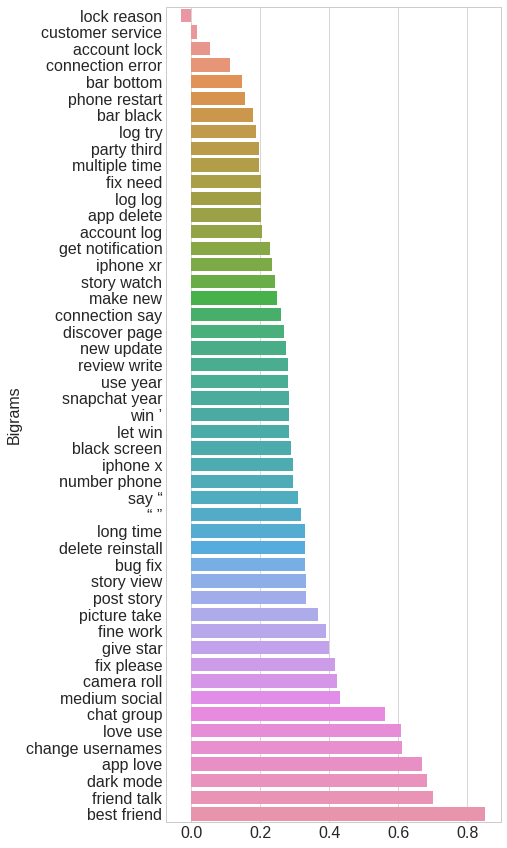

In [221]:
# Visual represtation of findings 
# Sentiment Score caculated with Vader
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df88 = df[['Bigrams', 'PolarityVader']].groupby('Bigrams')['PolarityVader'].mean().sort_values()
sns.barplot(x = df88.values, y = df88.index)
#df[['Bigrams', 'Compound']].groupby('Bigrams')['Bigrams'].mean().sort_values().size().plot(kind = 'bar')

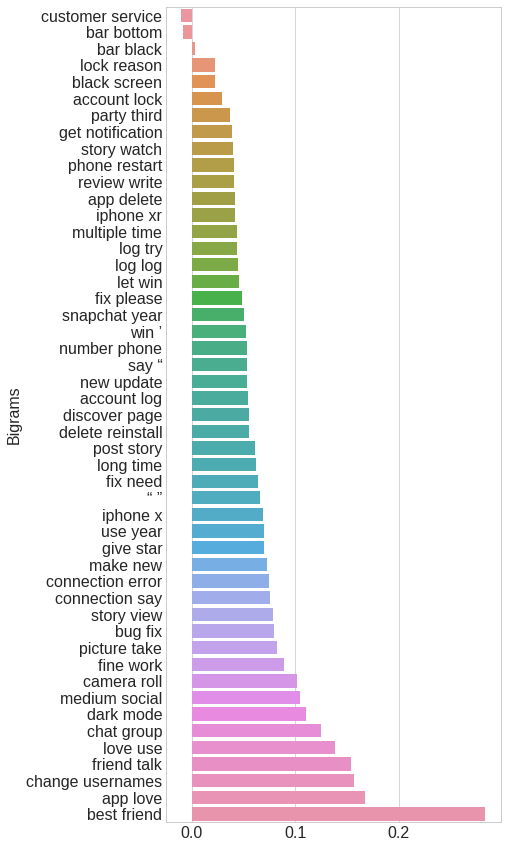

In [222]:
# Visual represtation of findings 
#  for Sentiment Score caculated with textblob
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df99 = df[['Bigrams', 'PolarityTextBlob']].groupby('Bigrams')['PolarityTextBlob'].mean().sort_values()
sns.barplot(x = df99.values, y = df99.index)

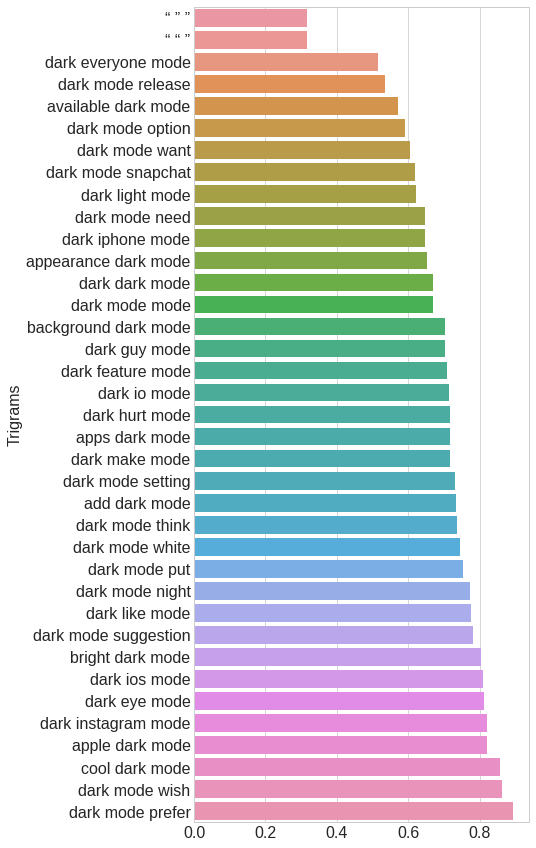

In [223]:
# Visual represtation of findings Trigram
# Sentiment Score caculated with Vader
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df88 = df[['Trigrams', 'PolarityVader']].groupby('Trigrams')['PolarityVader'].mean().sort_values()
sns.barplot(x = df88.values, y = df88.index)

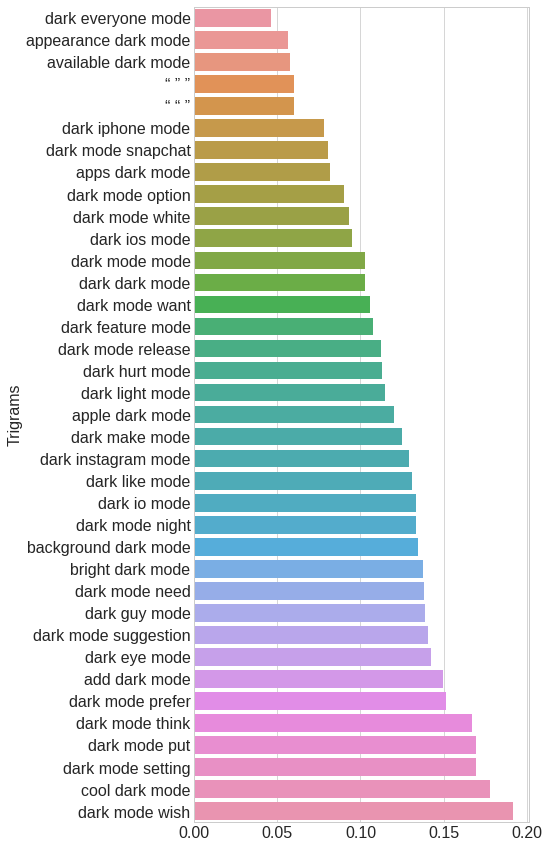

In [224]:
# Visual represtation of findings 
# Sentiment Score caculated with TextBlob
import seaborn as sns
f, ax = plt.subplots(figsize=(6, 15))
df88 = df[['Trigrams', 'PolarityTextBlob']].groupby('Trigrams')['PolarityTextBlob'].mean().sort_values()
sns.barplot(x = df88.values, y = df88.index)

# Ask and Answer Questions
1. How many of the reviews are positive
2. how many of the reviews are negative
3. how many of the reviews are neutral
4. What are the pecentages of each count mentioned above
5. What word appeared the most after the removal of stopwords.
6. Are they people who have commented more than once, during different timeperiods?
7. Have their opnions about the app changed?

# Limitations and Scope for future work:

1. In an event of pyspellchecker getting better and this fuction being able to work that is given a str of words, form list of words, check for the mispelled words,correct them, exchange bad words with correct words in the list, and put the list of words back into a sentence</br>
```Python
!pip install pyspellchecker --quiet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from spellchecker import SpellChecker
spell = SpellChecker()
def correction(text):
    sentence = ' '
    words_list = word_tokenize(text)
    j = 0</br>
    for word in words_list:
        print(word)
        if spell.unknown(word):
            words_list[j] = spell.correction(word)
            print(word)
        j = j + 1
    sentence = sentence.join(words_list)
    return sentence
```
</br>the results of the then analysis will be less error prone</br>
2. The sentiment analysis veracity is not very persuasive using TextBlob and VADER (even amid the pair, variations are noticed). Manual check revealed mistakes.
3. Similar features should be categorized together to give a better picture (this should not be very time consuming.) Also, here, the final sentiment scores have not been adjusted for the frequency of the features.
4. We need algorithms with extreme veracity to detect astroturfing (fake reviews).

# References
<a href=#Citation>1.</a>	De', R., Pandey, N., & Pal, A. (2020). Impact of digital surge during Covid-19 pandemic: A viewpoint on research and practice. International journal of information management, 55, 102171. https://doi.org/10.1016/j.ijinfomgt.2020.102171<br/>
2. https://medium.com/analytics-vidhya/feature-extraction-and-sentiment-analysis-of-reviews-of-3-apps-in-india-84b665e1a887
